# Certification Project 
 * Domain – Social Media
 * FOCUS – PREDICT NO. OF SHARES OF AN ARTICLE
* BUSINESS CHALLENGE/REQUIREMENT
* Mashable (www.mashable.com) -- is a global, multi-platform media and entertainment company. Powered by its own proprietary technology, Mashable is the go-to source for tech, digital culture and entertainment content for its dedicated and influential audience around the globe.
* Just like any other media company its success depends on the popularity of articles. And one of the key metrics to measure popularity is no. of shares done on article. Over period of few years Mashable has collected data on around 40,000 articles.

* You as ML expert have to do analysis and modeling to predict number of shares of an article given the input parameters.

**Import the usual libraries **

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import cross_validation,metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Get the Data
data = pd.read_csv('OnlineNewsPopularity.csv')

** Check out the info(), head(), and describe() methods on loans.**

In [3]:
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [5]:
x =data.drop(['url',data.keys()[1],data.keys()[-1]], axis=1)
x.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


#  Exploratory Data Analysis
* Let's do some data visualization!

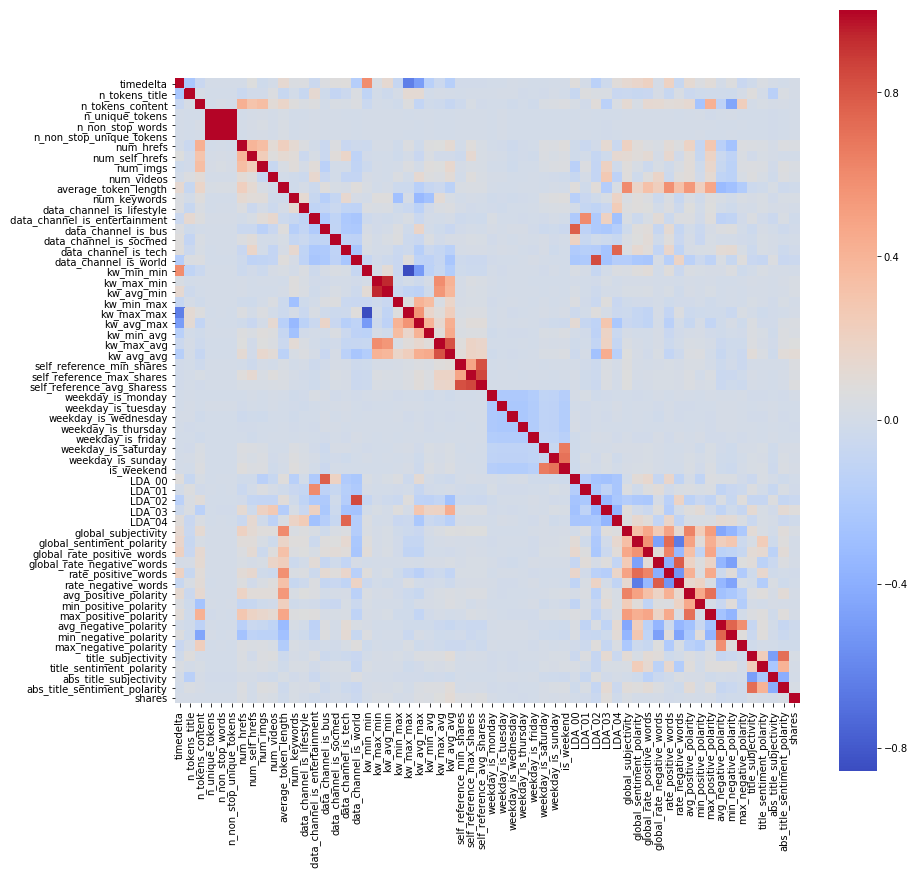

In [6]:
corr = data.corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True,
            cmap= 'coolwarm')
plt.show()

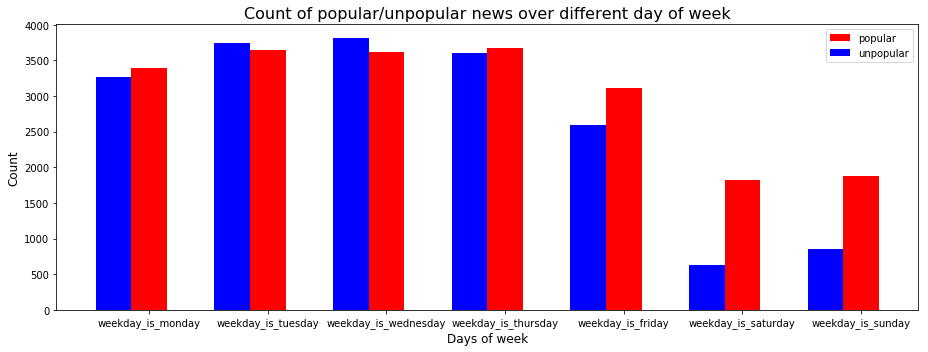

In [7]:
# Visualize the feature of different day of week
columns_day = x.columns.values[29:36]
unpop=data[data['shares']<1400]
pop=data[data['shares']>=1400]
unpop_day = unpop[columns_day].sum().values
pop_day = pop[columns_day].sum().values

import matplotlib.pyplot as pl
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

fig = pl.figure(figsize = (13,5))
pl.title("Count of popular/unpopular news over different day of week", fontsize = 16)
pl.bar(np.arange(len(columns_day)), pop_day, width = 0.3, align="center", color = 'r', \
          label = "popular")
pl.bar(np.arange(len(columns_day)) - 0.3, unpop_day, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
pl.xticks(np.arange(len(columns_day)), columns_day)
pl.ylabel("Count", fontsize = 12)
pl.xlabel("Days of week", fontsize = 12)
    
pl.legend(loc = 'upper right')
pl.tight_layout()
pl.show()

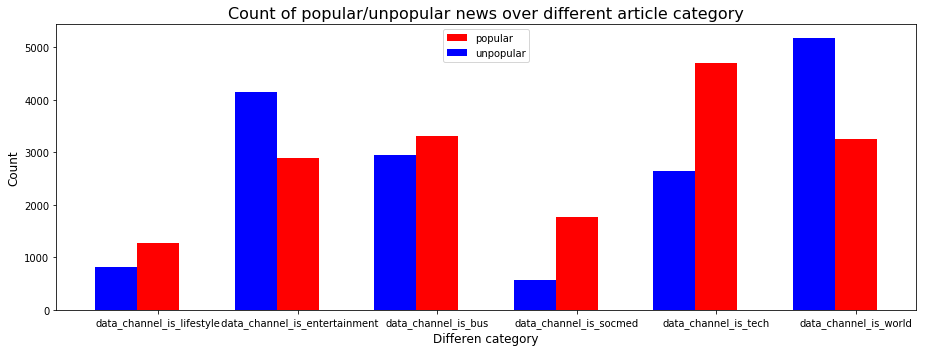

In [8]:
# Visualize the feature of different article category
columns_chan=x.columns.values[11:17]
unpop_chan = unpop[columns_chan].sum().values
pop_chan = pop[columns_chan].sum().values
fig = pl.figure(figsize = (13,5))
pl.title("Count of popular/unpopular news over different article category", fontsize = 16)
pl.bar(np.arange(len(columns_chan)), pop_chan, width = 0.3, align="center", color = 'r', \
          label = "popular")
pl.bar(np.arange(len(columns_chan)) - 0.3, unpop_chan, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
pl.xticks(np.arange(len(columns_chan)), columns_chan)

pl.ylabel("Count", fontsize = 12)
pl.xlabel("Differen category", fontsize = 12)
    
pl.legend(loc = 'upper center')
pl.tight_layout()
pl.show()

In [9]:
popular=data.shares>=1400
unpopular=data.shares<1400
data.loc[popular,'shares']=1
data.loc[unpopular,'shares']=0

In [10]:
cols=["data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
      "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world",
     "weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday","weekday_is_friday",
     "weekday_is_saturday","weekday_is_sunday"]

In [11]:
cols1=["global_subjectivity","rate_positive_words","rate_negative_words",
     "avg_positive_polarity","min_positive_polarity","max_positive_polarity","avg_negative_polarity","min_negative_polarity",
     "max_negative_polarity","title_subjectivity","abs_title_sentiment_polarity"]

In [12]:
cols2= ["url","timedelta","shares"]

In [13]:
for i in data.columns:
    if i not in cols and i not in cols1 and i not in cols2:
        data[i]=np.log(1.001+data[i])

data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,2.565026,5.393632,0.509582,0.693647,0.596848,1.609638,1.098946,0.693647,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.206409,0.001000,0.187500,0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,2.302685,5.545181,0.473587,0.693647,0.583860,1.386544,0.693647,0.693647,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.001000,0.406132,0.000000,0
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,2.302685,5.356591,0.454972,0.693647,0.509744,1.386544,0.693647,0.693647,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.001000,0.406132,0.000000,1
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,2.302685,6.276645,0.408652,0.693647,0.510806,2.302685,0.001000,0.693647,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.001000,0.406132,0.000000,0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,2.639129,6.978215,0.348292,0.693647,0.433009,2.995782,2.995782,3.044570,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.128713,0.045408,0.136364,0


In [14]:
features=list(data.columns[2:60])

# Train Test Split

Now its time to split our data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [16]:
X_train,X_test,y_train,y_test=train_test_split(data[features],data['shares'],test_size=0.25,random_state=0)

# Training the models

Now its time to train our model!


In [17]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,n_jobs=-1)
clf_rf=rf.fit(X_train,y_train)
print ("Random Forest")
print ("Accuracy= ",clf_rf.score(X_test,y_test))

Random Forest
Accuracy=  0.6649177681364141


In [18]:
from sklearn.naive_bayes import BernoulliNB
nb=BernoulliNB()
clf_nb=nb.fit(X_train,y_train)
print ("Accuracy= ",clf_nb.score(X_test,y_test))
y_predn=clf_rf.predict(X_test)

Accuracy=  0.5924730097871053


In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
clf_knn=knn.fit(X_train,y_train)
accuracy=clf_knn.score(X_test,y_test)
print ("KNN")
print ("Accuracy= ",accuracy)

KNN
Accuracy=  0.607002320653819


In [ ]:
from sklearn.svm import SVC
from sklearn import svm
svm=svm.SVC(kernel="rbf",probability=True)
clf_svm=svm.fit(X_train,y_train)
accuracy=clf_svm.score(X_test,y_test)
print ("SVM")
print ("Accuracy= ",accuracy)